In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre = Preprocessing('fer2013')
pre.load_data(filename='DatasetA.csv.gz', name='train')

X_df = pre.get(name='train').drop(columns=['emotion'])
y_df = pre.get(name='train')['emotion']

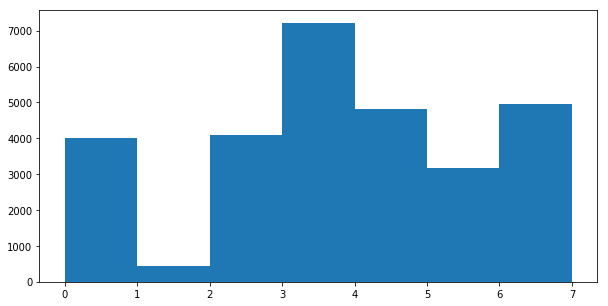

In [3]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [15]:
pre.load_data(filename='train_reduced.csv', name='train_reduced')

X_df_reduced = pre.get(name='train_reduced').drop(columns=['emotion'])
y_df_reduced = pre.get(name='train_reduced')['emotion']

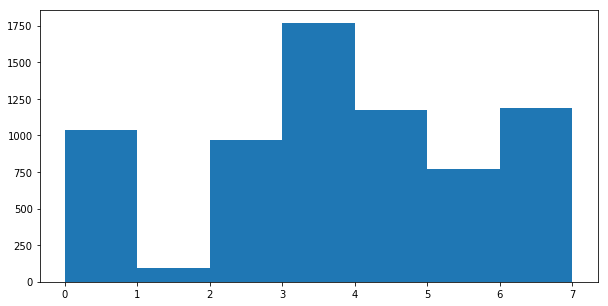

In [16]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df_reduced.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

# Analyze how the Disgust faces look like

In [17]:
pre.load_data(filename='test_public_norm.csv.gz', name='test').tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
3584,0.698039,0.690196,0.674510,0.678431,0.678431,0.682353,0.690196,0.678431,0.650980,0.650980,...,0.074510,0.094118,0.125490,0.125490,0.086275,0.058824,0.054902,0.058824,0.074510,4
3585,0.098039,0.133333,0.164706,0.172549,0.164706,0.184314,0.223529,0.231373,0.231373,0.227451,...,0.262745,0.274510,0.360784,0.313725,0.290196,0.129412,0.035294,0.047059,0.043137,3
3586,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.168627,0.172549,0.176471,0.180392,0.184314,0.188235,0.188235,0.196078,0.180392,4
3587,0.129412,0.098039,0.121569,0.141176,0.141176,0.164706,0.270588,0.403922,0.517647,0.639216,...,0.043137,0.035294,0.031373,0.023529,0.015686,0.015686,0.015686,0.019608,0.015686,4
3588,0.239216,0.247059,0.231373,0.294118,0.592157,0.623529,0.650980,0.631373,0.560784,0.666667,...,0.152941,0.360784,0.545098,0.560784,0.635294,0.466667,0.443137,0.647059,0.705882,4


In [19]:
disgust = pre.get(name='test').loc[pre.get(name='test')['emotion'] == 1]

In [33]:
from image_utils import ImageConverter, ImageExporter
import matplotlib.pyplot as plt
import os
img_conv = ImageConverter()


In [26]:
train_only_disgust_np = disgust.drop(columns = ['emotion']).values

In [38]:
img_exporter = ImageExporter()
path = img_exporter.directory + 'disgust' + '/'
root_dir = os.getcwd()
directory_template = f'{root_dir}/../data/captured_images/disgust/'
directory = directory_template.format(root_dir=img_exporter.directory, name='disgust')

if not os.path.exists(directory):
    print(f'Creating captured data directory')
    os.makedirs(directory)

Creating captured data directory


In [39]:
directory

'/Users/raroito/PycharmProjects/facial_expression_recognition/Notebooks/../../data/captured_images/disgust/'

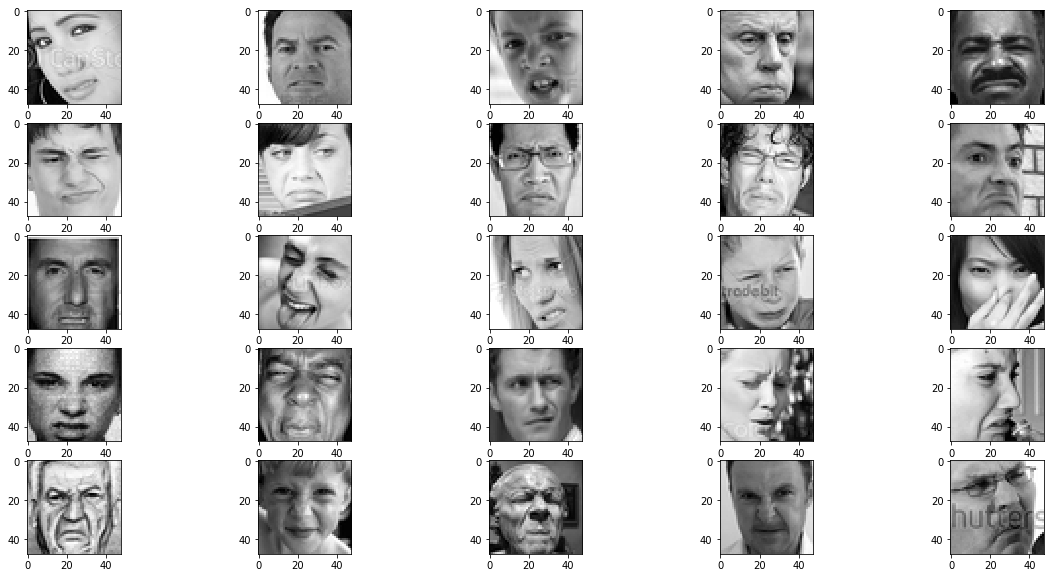

In [41]:
plt.figure(1, figsize=(20, 10))

for i in range(25):
    array = train_only_disgust_np[i]
    array_frame = img_conv.reshape_array_to_frame(array)
    plt.subplot(5,5, i + 1)
    plt.imshow(array_frame, cmap='gray', interpolation='none')
    img_exporter._save_original(np.dot(array_frame, 255), directory, name = f'd_{i}')

plt.show()